<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/Keras-STP-BOD-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [34]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [36]:
stp=pd.read_csv("STP.csv")
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  136 non-null    object 
 1   Influent BOD5         136 non-null    int64  
 2   Influent TSS          136 non-null    int64  
 3   Influent NH3          136 non-null    float64
 4   temperature           136 non-null    float64
 5   Influent pH           136 non-null    float64
 6   Influent Alkalinity   136 non-null    int64  
 7   Effluent BOD5         136 non-null    float64
 8   Effluent TSS          136 non-null    float64
 9   Effluent NH3          136 non-null    float64
 10  Aerobic NOx           136 non-null    float64
 11  Effluent pH           136 non-null    float64
 12  Field MLSS            136 non-null    float64
 13  Anoxic tank DO        136 non-null    float64
 14  Aerobic NH3           136 non-null    float64
 15  Aerobic DO            1

In [38]:
stp.pop('Influent TSS')
stp.pop('Effluent TSS')
stp.pop('Unnamed: 16')
stp.pop('Date')
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influent BOD5         136 non-null    int64  
 1   Influent NH3          136 non-null    float64
 2   temperature           136 non-null    float64
 3   Influent pH           136 non-null    float64
 4   Influent Alkalinity   136 non-null    int64  
 5   Effluent BOD5         136 non-null    float64
 6   Effluent NH3          136 non-null    float64
 7   Aerobic NOx           136 non-null    float64
 8   Effluent pH           136 non-null    float64
 9   Field MLSS            136 non-null    float64
 10  Anoxic tank DO        136 non-null    float64
 11  Aerobic NH3           136 non-null    float64
 12  Aerobic DO            136 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.9 KB


In [40]:
X=stp.drop(['Effluent BOD5'],axis=1).values
y=stp['Effluent BOD5'].values

In [97]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [98]:
X_train.shape, y_train.shape

((76, 12), (76,))

In [99]:
X_valid.shape, y_valid.shape

((26, 12), (26,))

In [100]:
X_test.shape, y_test.shape

((34, 12), (34,))

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [102]:
np.random.seed(23)
tf.random.set_seed(23)

In [103]:
model = tf.keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [104]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [116]:
model_history=model.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 [==============================] - 0s 27ms/step - loss: 0.3819 - mae: 0.4457 - val_loss: 5.5879 - val_mae: 1.4175
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3832 - mae: 0.4458 - val_loss: 5.5888 - val_mae: 1.4181
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3808 - mae: 0.4461 - val_loss: 5.5909 - val_mae: 1.4184
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3807 - mae: 0.4461 - val_loss: 5.5920 - val_mae: 1.4187
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3802 - mae: 0.4452 - val_loss: 5.5910 - val_mae: 1.4186
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3802 - mae: 0.4454 - val_loss: 5.5915 - val_mae: 1.4190
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3792 - mae: 0.4449 - val_loss: 5.5913 - val_mae: 1.4189
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3799 - mae: 0.44

In [117]:
mae_test=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 6.6291 - mae: 1.4814


In [118]:
model_history.history

{'loss': [0.38186535239219666,
  0.38320600986480713,
  0.3807816505432129,
  0.38068658113479614,
  0.3802335560321808,
  0.3801586925983429,
  0.3791947662830353,
  0.3799147307872772,
  0.3785681426525116,
  0.378121554851532,
  0.3777576684951782,
  0.37756115198135376,
  0.37760332226753235,
  0.37672677636146545,
  0.37630146741867065,
  0.37576013803482056,
  0.376368910074234,
  0.3749741017818451,
  0.37453052401542664,
  0.3742186427116394,
  0.3738706409931183,
  0.3734654486179352,
  0.3735085129737854,
  0.3736385405063629,
  0.3728143572807312,
  0.37339282035827637,
  0.3718315064907074,
  0.37215128540992737,
  0.3710169494152069,
  0.37094739079475403,
  0.3705873489379883,
  0.3703066110610962,
  0.3695889413356781,
  0.3695584833621979,
  0.36874425411224365,
  0.3690001368522644,
  0.3677307665348053,
  0.3674722909927368,
  0.3678315579891205,
  0.3669699728488922,
  0.36722415685653687,
  0.3666015565395355,
  0.3662441670894623,
  0.3656805455684662,
  0.36513248

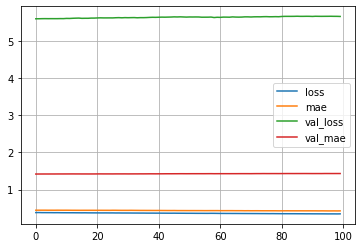

In [119]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [120]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[2.891915 ],
        [3.479027 ],
        [4.6948524],
        [8.135889 ],
        [3.00626  ],
        [4.74233  ],
        [5.0667243],
        [5.523343 ],
        [2.7097065],
        [4.006379 ],
        [3.9444807],
        [5.9443083],
        [3.691169 ],
        [3.0184476],
        [4.3859305],
        [4.2283115],
        [4.091854 ],
        [3.1408591],
        [4.705802 ],
        [3.7711203],
        [1.5243691],
        [3.1391957],
        [4.2645564],
        [2.8569813],
        [4.494782 ],
        [5.0259123],
        [4.3636403],
        [4.866329 ],
        [3.9683888],
        [5.2831593],
        [2.5914917],
        [3.7763524],
        [5.0389924],
        [3.3660102]], dtype=float32),
 array([ 3.  ,  1.  ,  4.6 , 17.  ,  3.74,  4.8 ,  4.  ,  5.74, 10.  ,
         4.2 ,  1.  ,  5.5 , 10.  ,  6.  ,  6.  ,  5.8 ,  4.11,  2.94,
         2.  ,  3.57,  1.79,  3.49,  4.  ,  4.  ,  5.  ,  3.  ,  1.5 ,
         5.5 ,  4.  ,  4.5 ,  3.07,  3.99,  4.8 ,  3.84]